Student responses

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
responses = pd.read_csv('feedback/student_feedback.csv')

In [3]:
from numbers import Number
from collections import Counter
from textwrap import wrap

In [4]:
def default_bar(column_name, labels, plot_labels=None, wrapcols=0):
    if isinstance(labels, Number):
        n = labels
        labels = range(1, n + 1)
    else:
        n = len(labels)
    if plot_labels is None:
        plot_labels = labels
    if wrapcols:
        plot_labels = ['\n'.join(wrap(line, wrapcols))
                       for line in plot_labels]                           
    column = responses[column_name]
    counts = Counter(list(column))
    values = [counts[label] for label in labels]
    max_c = max(values)
    plt.barh(range(n), values[::-1])
    ax = plt.gca()
    ax.set_title(column_name)
    ax.set_xticks(range(max_c + 1))
    ax.set_xticklabels(range(max_c + 1))
    ax.set_yticks(range(n))
    ax.set_yticklabels(plot_labels[::-1])
    return column

0     The bursary and the learning were equally impo...
1                                 The 100 pound bursary
2            I wanted to learn more about data analysis
3            I wanted to learn more about data analysis
4     The bursary and the learning were equally impo...
5            I wanted to learn more about data analysis
6     The bursary and the learning were equally impo...
7                                 The 100 pound bursary
8     The bursary and the learning were equally impo...
9     The bursary and the learning were equally impo...
10           I wanted to learn more about data analysis
11           I wanted to learn more about data analysis
12    The bursary and the learning were equally impo...
13                                The 100 pound bursary
14           I wanted to learn more about data analysis
Name: The main reason I wanted to do this course was, dtype: object

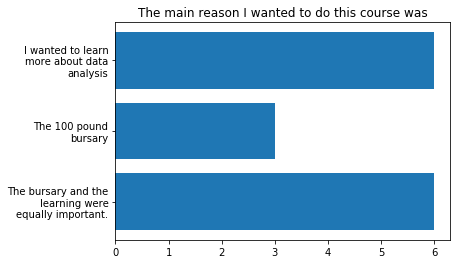

In [5]:
default_bar('The main reason I wanted to do this course was', [
    'I wanted to learn more about data analysis',
    'The 100 pound bursary',
    'The bursary and the learning were equally important.'],
           wrapcols=20)

0                           I've never written any code
1                           I've never written any code
2                  I have written a lot of useful code.
3         I have written a small amount of useful code.
4                           I've never written any code
5     I've played with code but never wrote anything...
6                           I've never written any code
7         I have written a small amount of useful code.
8                           I've never written any code
9                           I've never written any code
10    I've played with code but never wrote anything...
11    I've played with code but never wrote anything...
12    I've played with code but never wrote anything...
13                          I've never written any code
14    I've played with code but never wrote anything...
Name: How much computer code have you written?, dtype: object

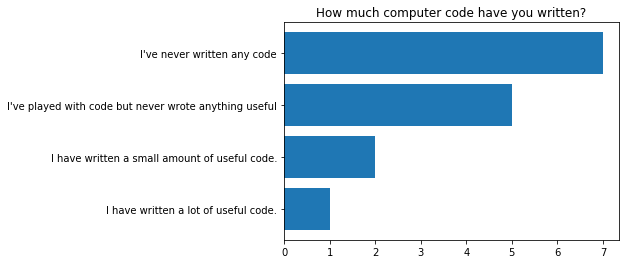

In [6]:
default_bar('How much computer code have you written?', [
    "I've never written any code",
    "I've played with code but never wrote anything useful",
    "I have written a small amount of useful code.",
    "I have written a lot of useful code."
    ])

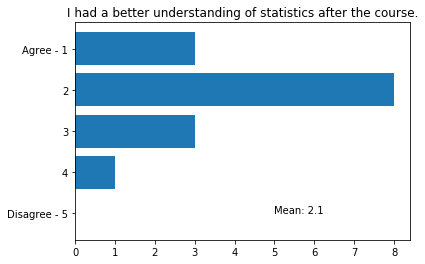

In [7]:
col = default_bar('I had a better understanding of statistics after the course.', 5, 
           ['Agree - 1', '2', '3', '4', 'Disagree - 5'])
plt.text(5, 0, 'Mean: {:0.1f}'.format(np.mean(col)))

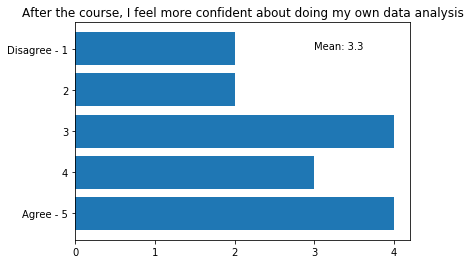

In [8]:
col = default_bar('After the course, I feel more confident about doing my own data analysis', 5, 
               ['Disagree - 1', '2', '3', '4', 'Agree - 5'])
plt.text(3, 4, 'Mean: {:0.1f}'.format(np.mean(col)))

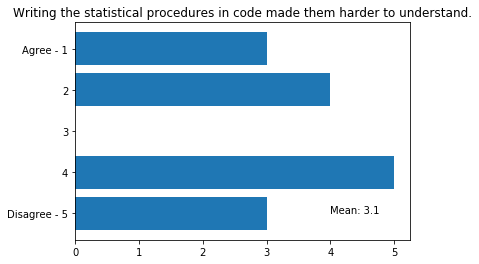

In [9]:
col = default_bar('Writing the statistical procedures in code made them harder to understand.', 5, 
               ['Agree - 1', '2', '3', '4', 'Disagree - 5'])
plt.text(4, 0, 'Mean: {:0.1f}'.format(np.mean(col)))

col = default_bar('About the pace of the course, was it:', 5,
            ['Too fast - 1', '2', '3', '4', 'Too slow - 5'])
plt.text(4, 0, 'Mean: {:0.1f}'.format(np.mean(col)))

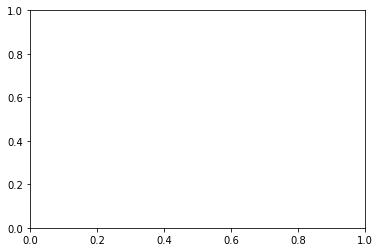

In [10]:
ax, fig = plt.subplots()

In [11]:
from textwrap import wrap

In [12]:
def default_text(column_name, n_cols):
    column = list(responses[column_name])
    title = 'Question: {}\n\n\n'.format(column_name)
    replies = ['\n'.join(wrap(line, n_cols)) for line in column
              if isinstance(line, str)]
    reply_text = title + '\n\n'.join(replies)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    max_y = len(reply_text.split('\n'))
    ax.axis('off')
    ax.text(0, 0, reply_text, fontsize=14)

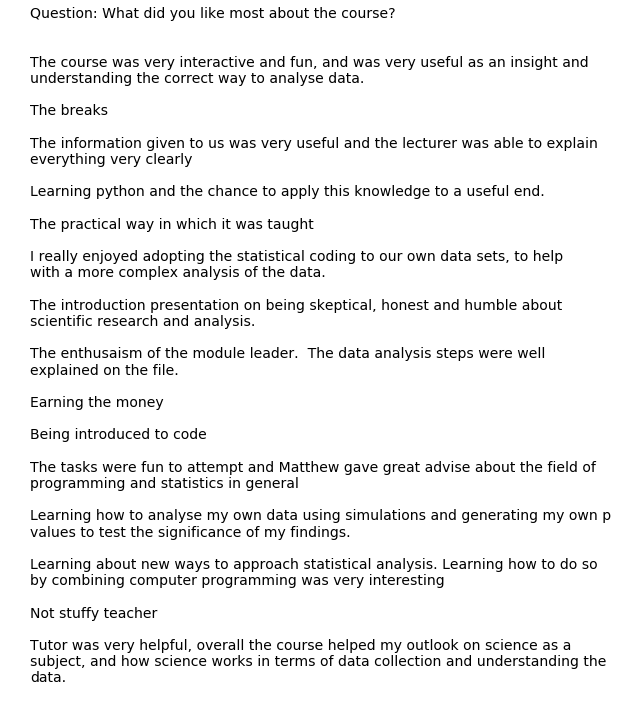

In [13]:
default_text('What did you like most about the course?', 80)

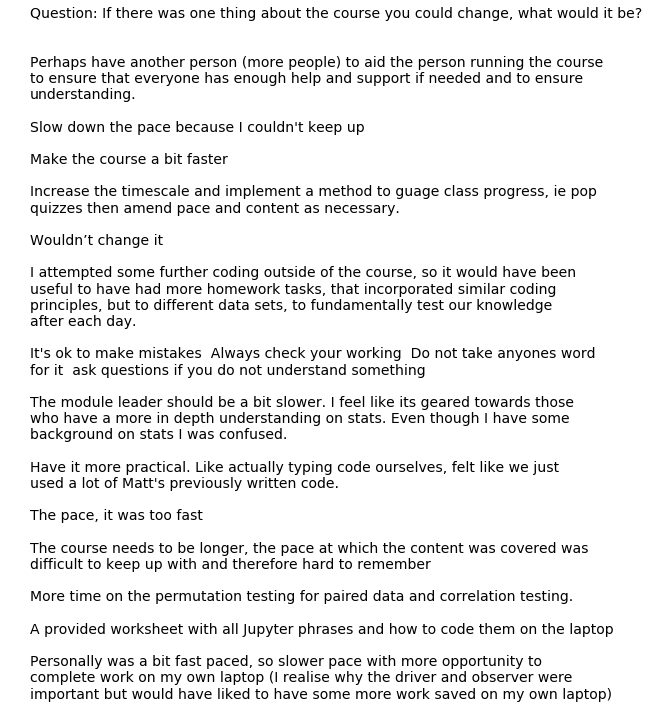

In [14]:
default_text('If there was one thing about the course you could change, what would it be?', 80)

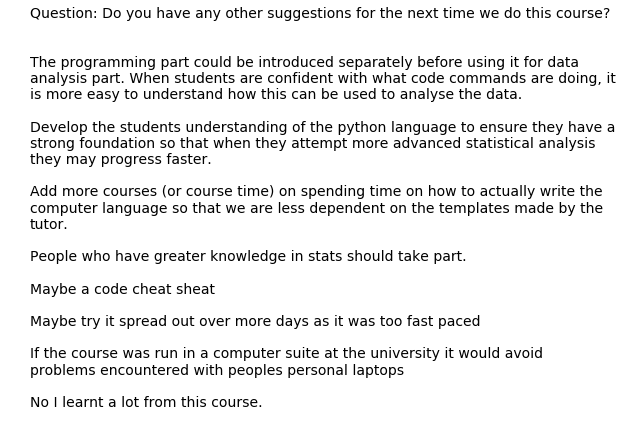

In [15]:
default_text('Do you have any other suggestions for the next time we do this course?', 80)

In [16]:
def responses_to_markdown(column_name, n_cols=76, header_level=1):
    column = responses[column_name]
    # Some lines may be NaN
    replies = ['> ' + '\n> '.join(wrap(line, n_cols)) for line in column
               if isinstance(line, str)]
    return '{} {}\n\n{}\n'.format(
        '#' * header_level,
        column_name,
        '\n\n'.join(replies))


In [17]:
print(responses_to_markdown('What did you like most about the course?'))

# What did you like most about the course?

> The course was very interactive and fun, and was very useful as an insight
> and understanding the correct way to analyse data.

> The breaks

> The information given to us was very useful and the lecturer was able to
> explain everything very clearly

> Learning python and the chance to apply this knowledge to a useful end.

> The practical way in which it was taught

> I really enjoyed adopting the statistical coding to our own data sets, to
> help with a more complex analysis of the data.

> The introduction presentation on being skeptical, honest and humble about
> scientific research and analysis.

> The enthusaism of the module leader.  The data analysis steps were well
> explained on the file.

> Earning the money

> Being introduced to code

> The tasks were fun to attempt and Matthew gave great advise about the field
> of programming and statistics in general

> Learning how to analyse my own data using simulations and generating m

In [18]:
responses.corr()

,I had a better understanding of statistics after the course.,Writing the statistical procedures in code made them harder to understand.,"After the course, I feel more confident about doing my own data analysis","About the pace of the course, was it:"
I had a better understanding of statistics after the course.,1.000000,-0.454276,-0.347417,-0.600014
Writing the statistical procedures in code made them harder to understand.,-0.454276,1.000000,0.388850,0.314945
"After the course, I feel more confident about doing my own data analysis",-0.347417,0.388850,1.000000,-0.246932
"About the pace of the course, was it:",-0.600014,0.314945,-0.246932,1.000000


In [19]:
coders = (
    (responses['How much computer code have you written?'] == 'I have written a lot of useful code.') |
(responses['How much computer code have you written?'] == 'I have written a small amount of useful code.')
)


In [20]:
responses[coders]

,Timestamp,The main reason I wanted to do this course was,How much computer code have you written?,I had a better understanding of statistics after the course.,Writing the statistical procedures in code made them harder to understand.,"After the course, I feel more confident about doing my own data analysis","About the pace of the course, was it:",What did you like most about the course?,"If there was one thing about the course you could change, what would it be?",Do you have any other suggestions for the next time we do this course?
2,2017/09/21 8:18:14 PM GMT+1,I wanted to learn more about data analysis,I have written a lot of useful code.,1,5,1,4,The information given to us was very useful an...,Make the course a bit faster,The programming part could be introduced separ...
3,2017/09/21 9:29:07 PM GMT+1,I wanted to learn more about data analysis,I have written a small amount of useful code.,1,2,5,3,Learning python and the chance to apply this k...,Increase the timescale and implement a method ...,Develop the students understanding of the pyth...
7,2017/09/22 12:11:27 PM GMT+1,The 100 pound bursary,I have written a small amount of useful code.,2,4,4,1,The enthusaism of the module leader. The data...,The module leader should be a bit slower. I fe...,People who have greater knowledge in stats sho...


In [21]:
mercenaries = responses['The main reason I wanted to do this course was'] == 'The 100 pound bursary'

In [22]:
responses[mercenaries]

,Timestamp,The main reason I wanted to do this course was,How much computer code have you written?,I had a better understanding of statistics after the course.,Writing the statistical procedures in code made them harder to understand.,"After the course, I feel more confident about doing my own data analysis","About the pace of the course, was it:",What did you like most about the course?,"If there was one thing about the course you could change, what would it be?",Do you have any other suggestions for the next time we do this course?
1,2017/09/21 6:32:19 PM GMT+1,The 100 pound bursary,I've never written any code,4,1,1,2,The breaks,Slow down the pace because I couldn't keep up,NaN
7,2017/09/22 12:11:27 PM GMT+1,The 100 pound bursary,I have written a small amount of useful code.,2,4,4,1,The enthusaism of the module leader. The data...,The module leader should be a bit slower. I fe...,People who have greater knowledge in stats sho...
13,2017/09/29 1:44:10 AM GMT+1,The 100 pound bursary,I've never written any code,3,2,3,2,Not stuffy teacher,NaN,NaN
